# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
#suprimir notação ciêntifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Carregando a Base de Dados

In [3]:
connect_dw_imoveis = sqlite3.connect("/content/imoveis_dw.db")

In [6]:
data = pd.read_sql_query(r""" SELECT * FROM IMOVEIS   """,     connect_dw_imoveis )

In [7]:
data.head()

cidade estado  ...  valor_iptu  valor_seguro_incendio
0     São Paulo     SP  ...         211                     42
1     São Paulo     SP  ...        1750                     63
2  Porto Alegre     RS  ...           0                     41
3  Porto Alegre     RS  ...          22                     17
4     São Paulo     SP  ...          25                     11

[5 rows x 13 columns]

Exibindo as informações da base de dados

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


Análise Estatística Básica.

In [9]:
data.describe()

area   num_quartos  ...     valor_iptu  valor_seguro_incendio
count  10692.000000  10692.000000  ...   10692.000000           10692.000000
mean     149.217920      2.506079  ...     366.704358              53.300879
std      537.016942      1.171266  ...    3107.832321              47.768031
min       11.000000      1.000000  ...       0.000000               3.000000
25%       56.000000      2.000000  ...      38.000000              21.000000
50%       90.000000      2.000000  ...     125.000000              36.000000
75%      182.000000      3.000000  ...     375.000000              68.000000
max    46335.000000     13.000000  ...  313700.000000             677.000000

[8 rows x 11 columns]

Verificando a correlação dos atributos

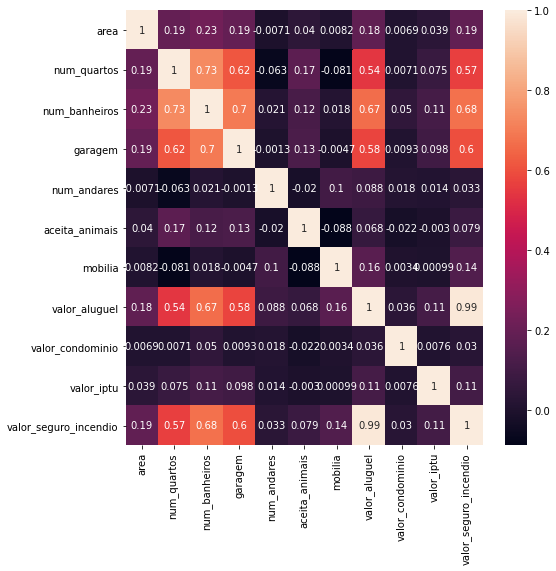

In [10]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

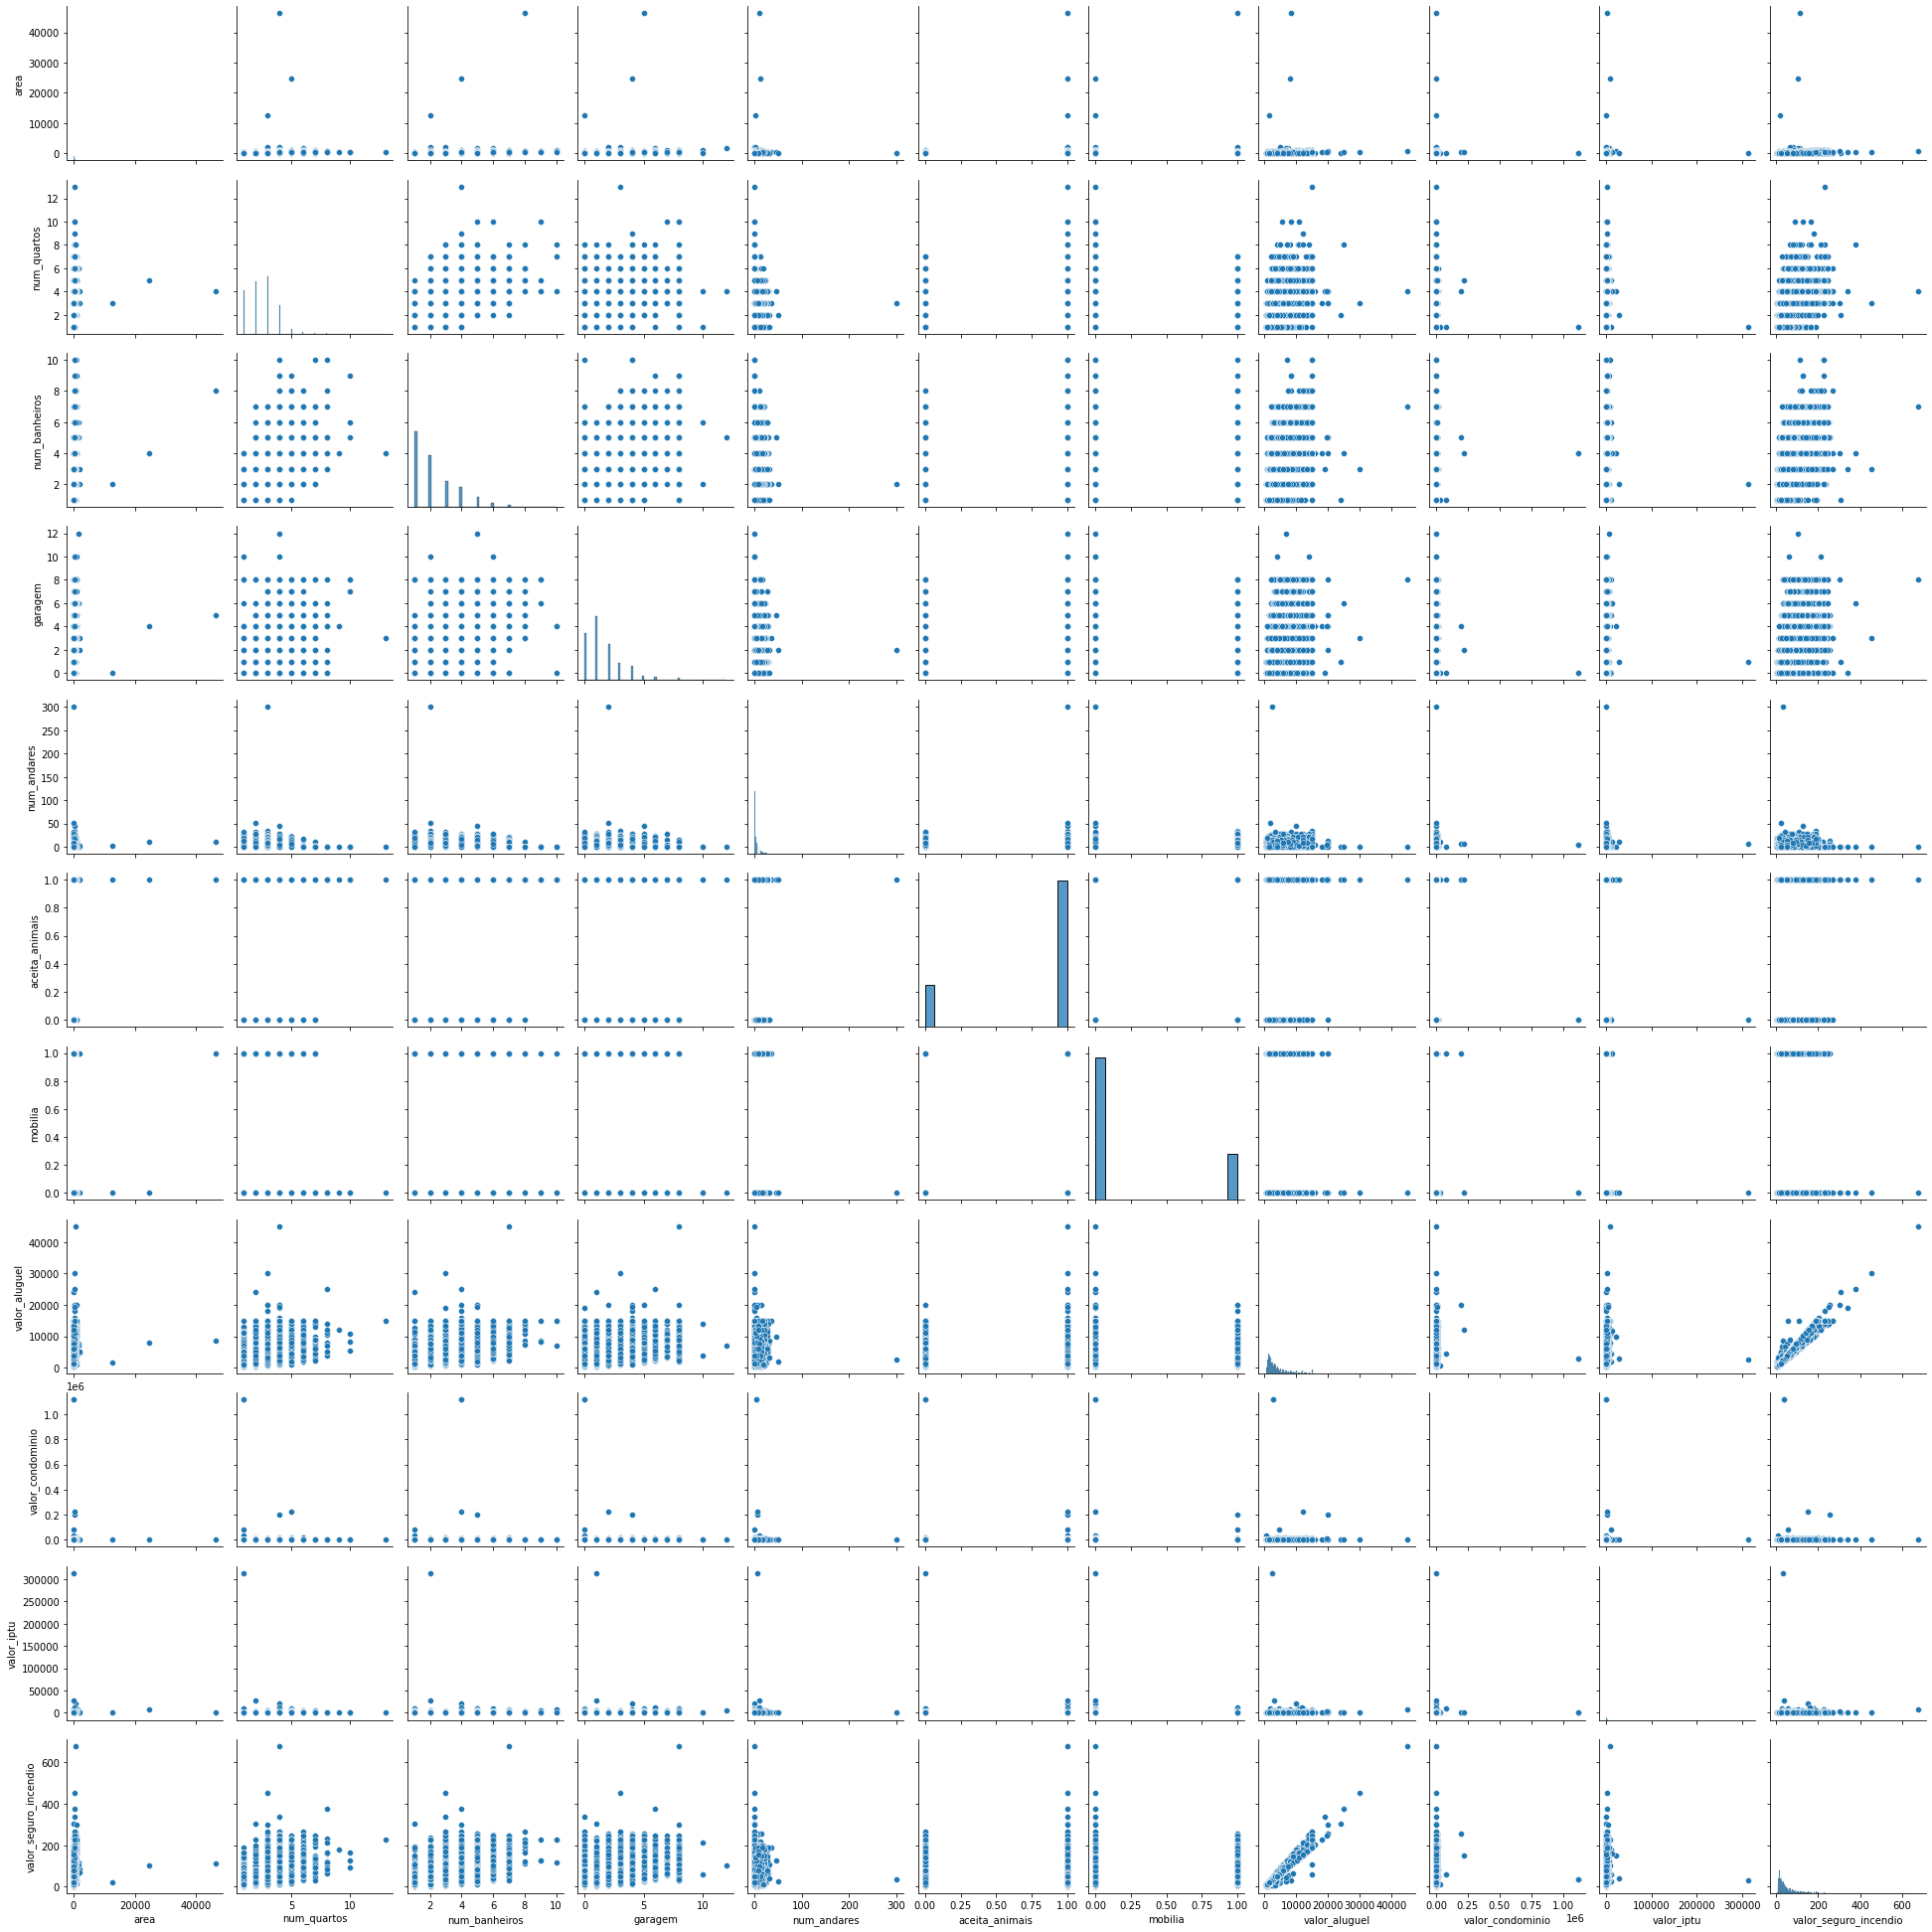

In [11]:
sns.pairplot(data)

In [12]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 199kB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [13]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



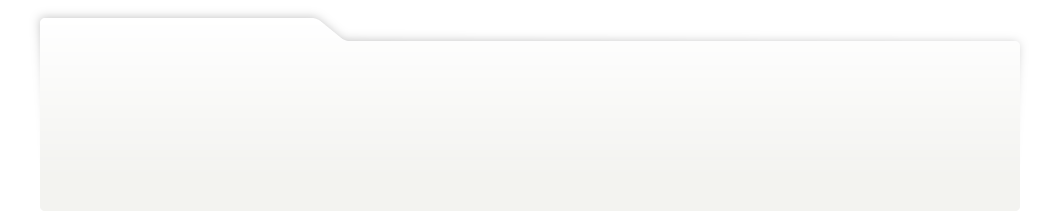
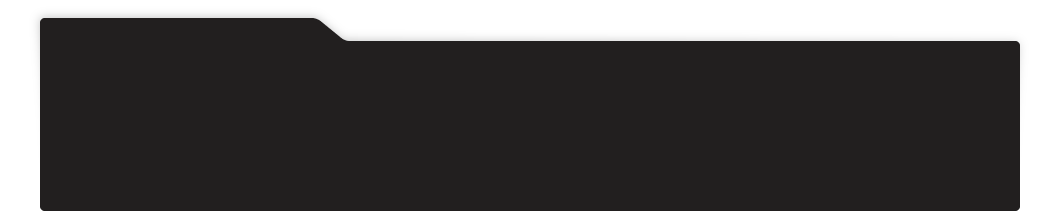
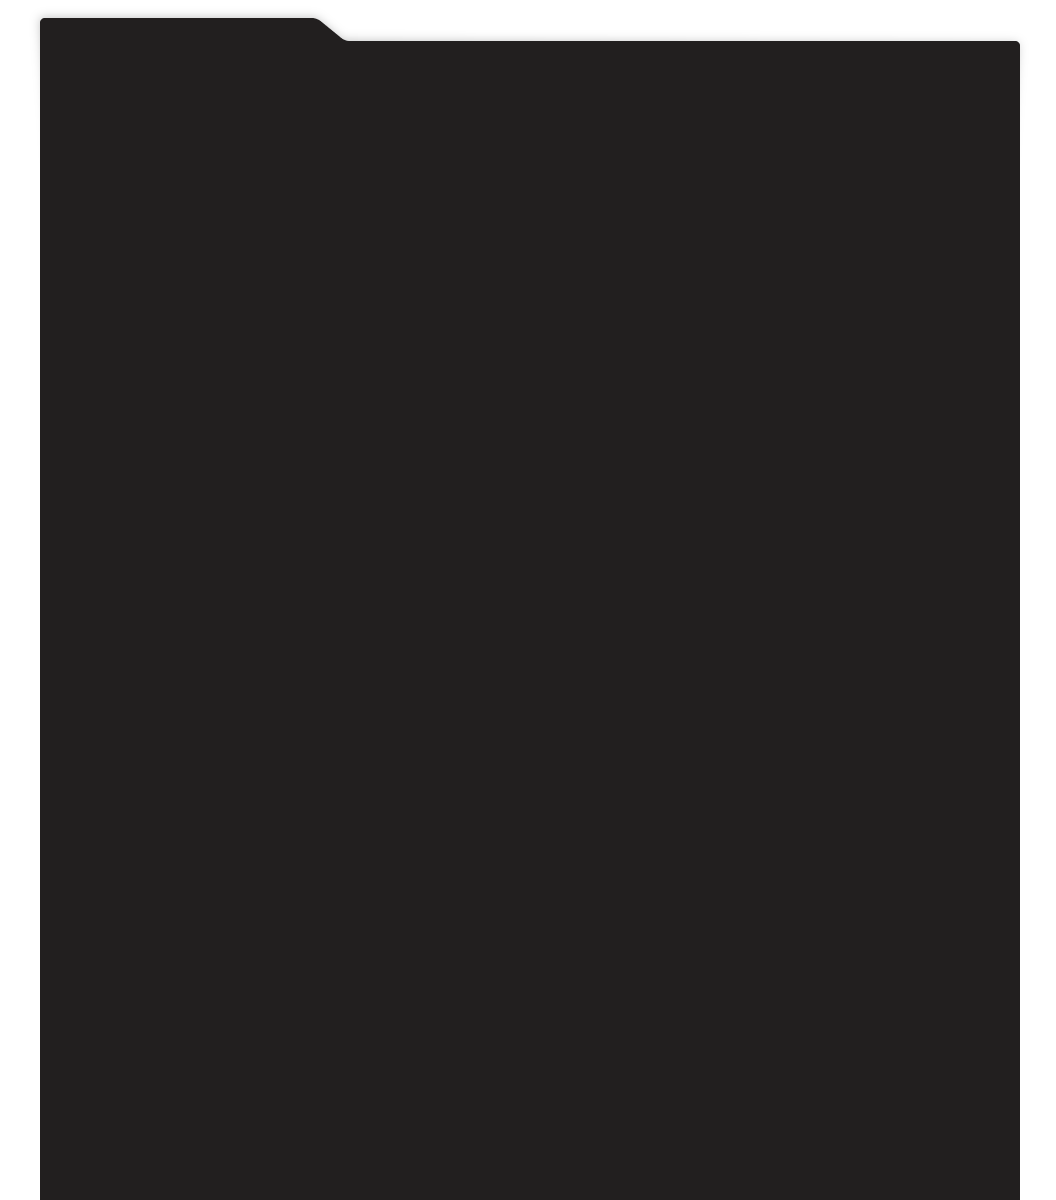
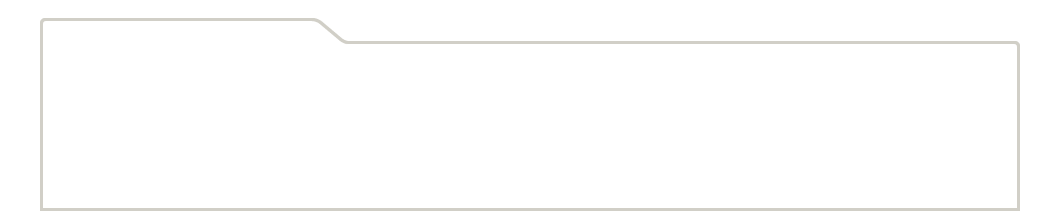
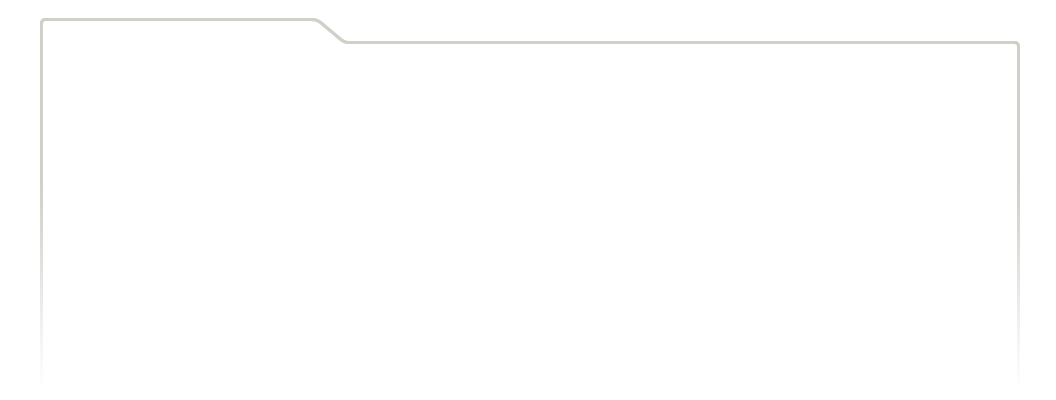
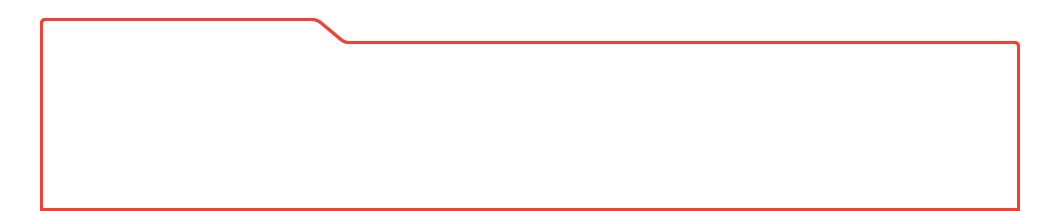
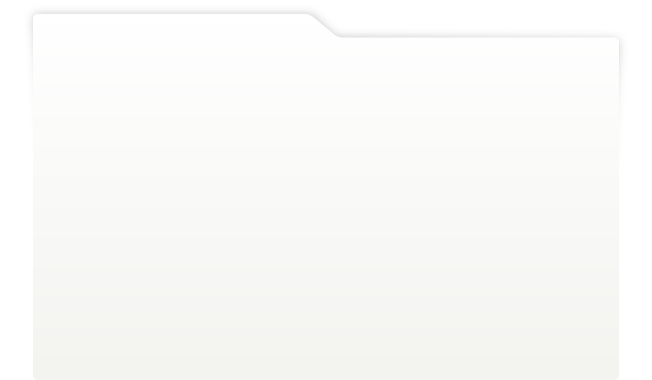
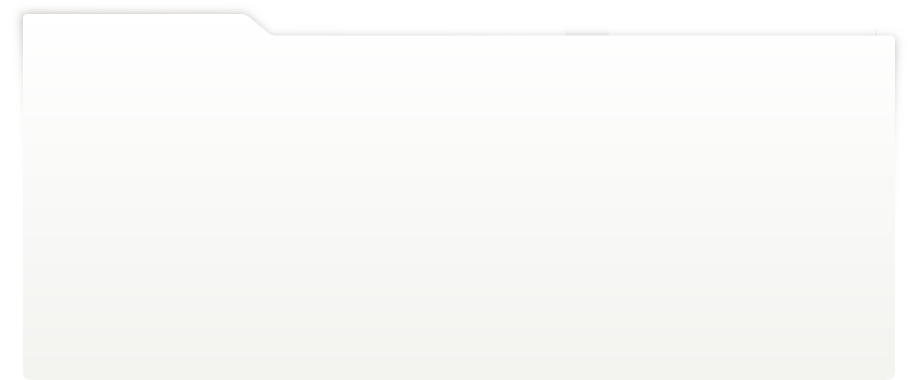
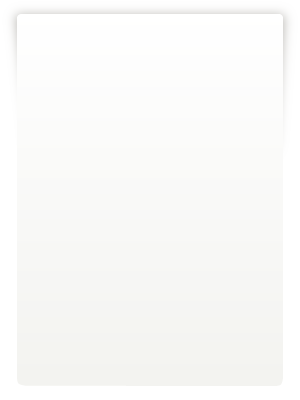
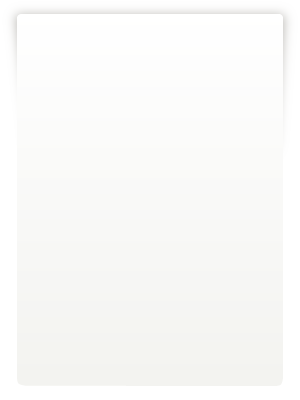
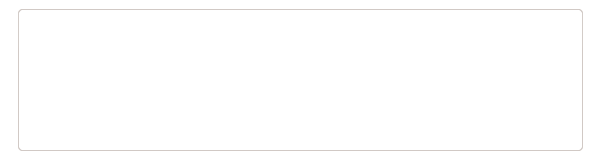
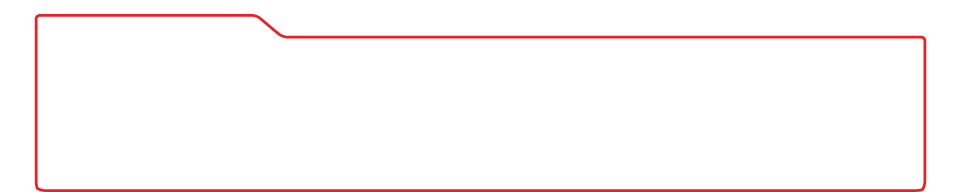
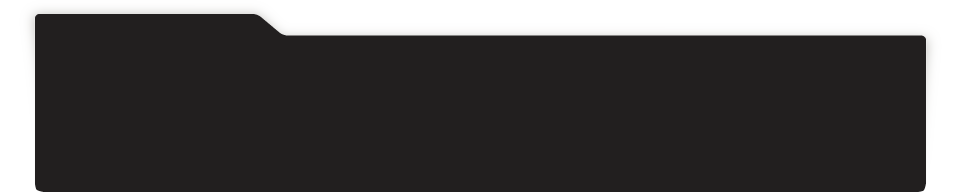
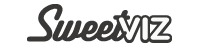
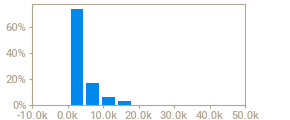
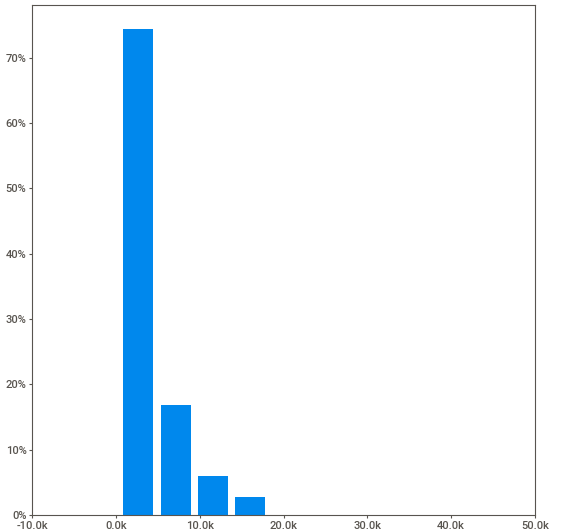
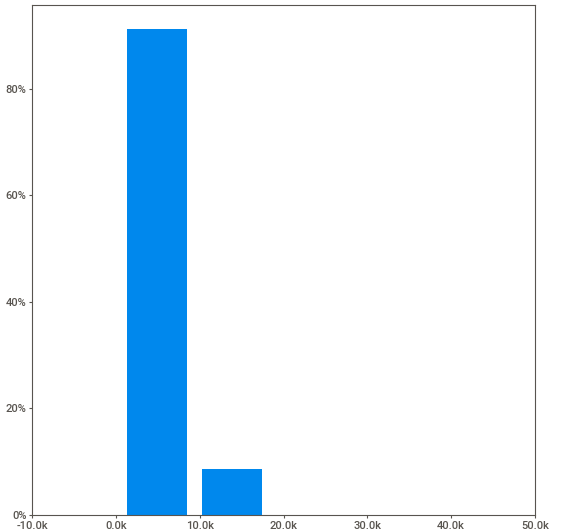
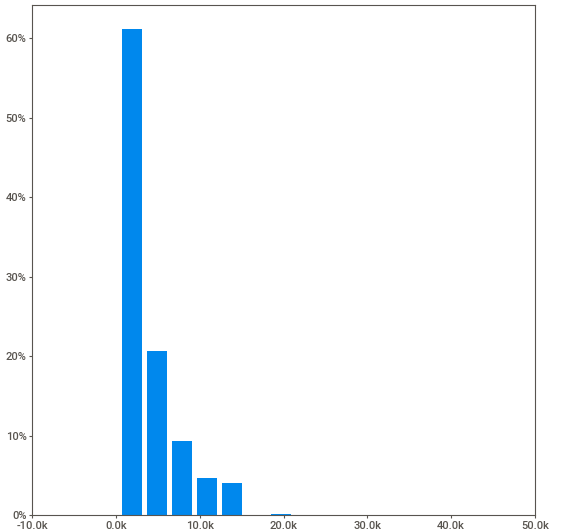
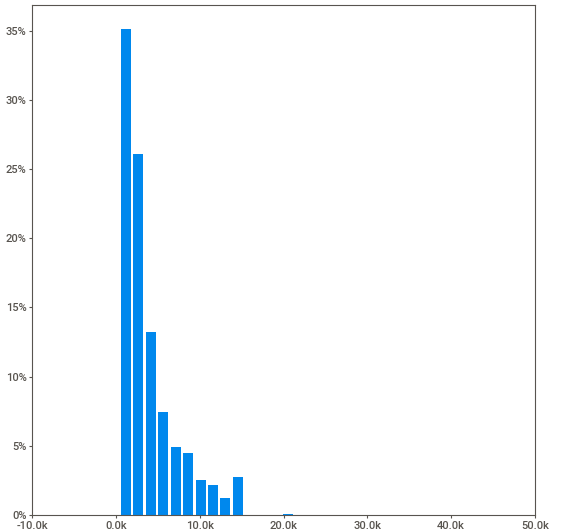
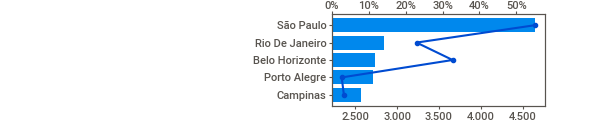
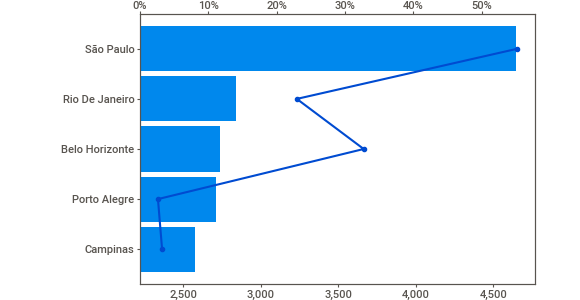
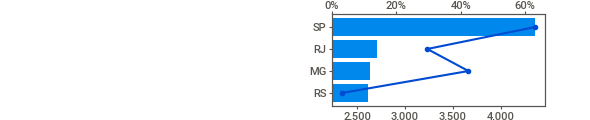
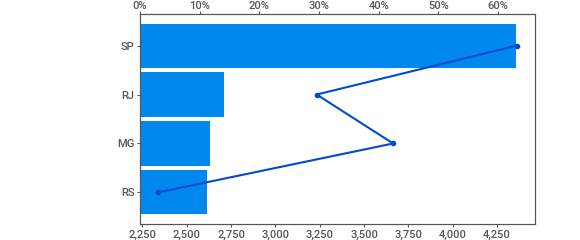
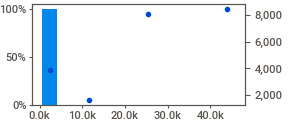
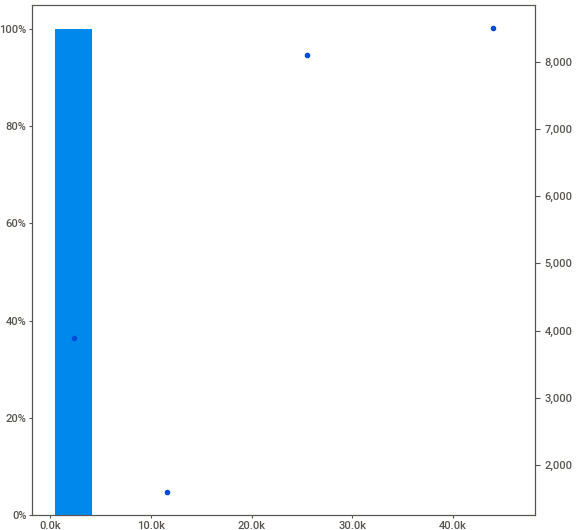
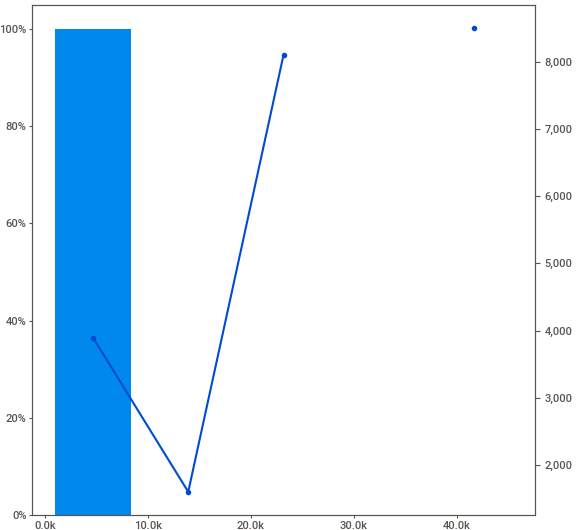
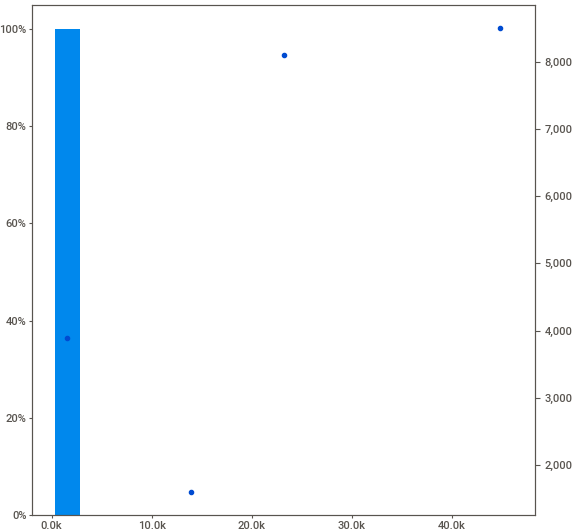
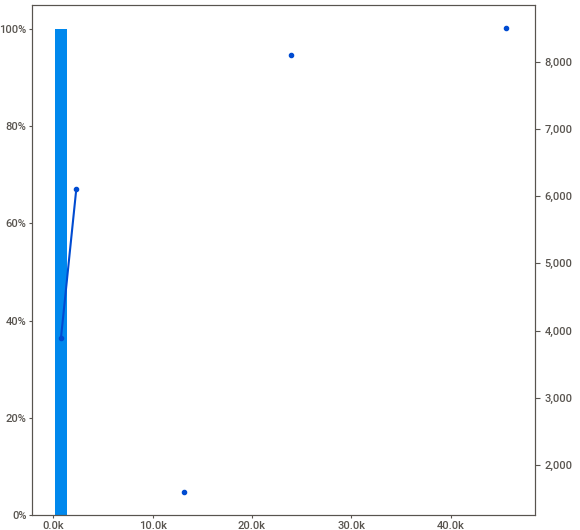
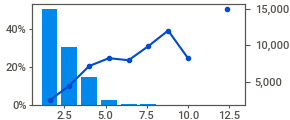
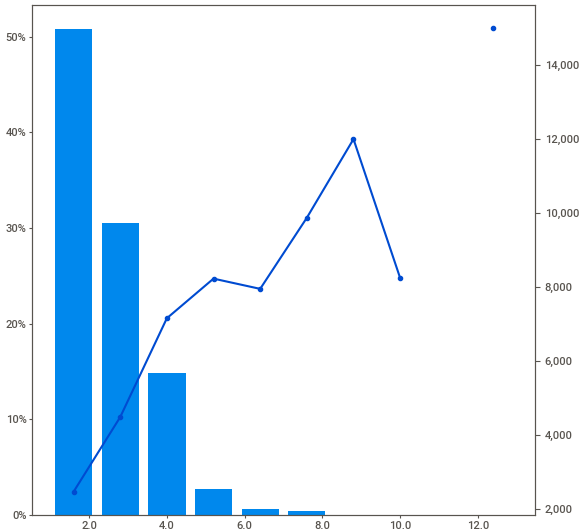
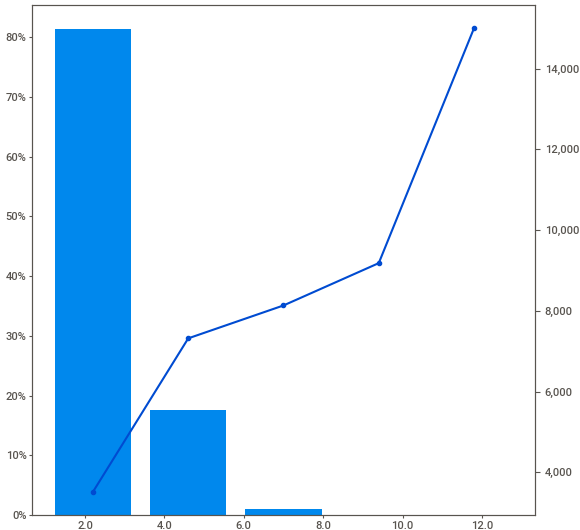
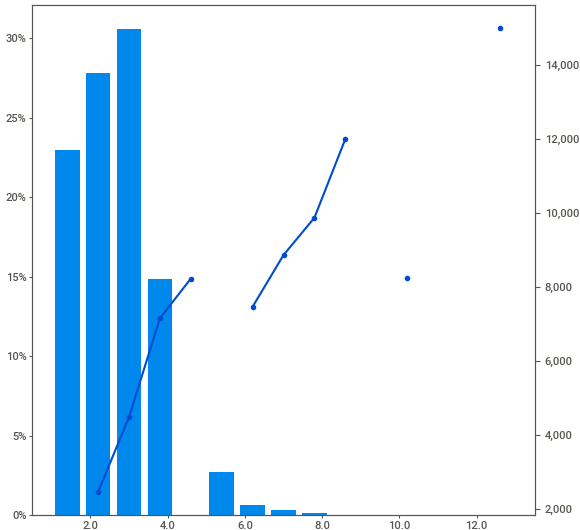
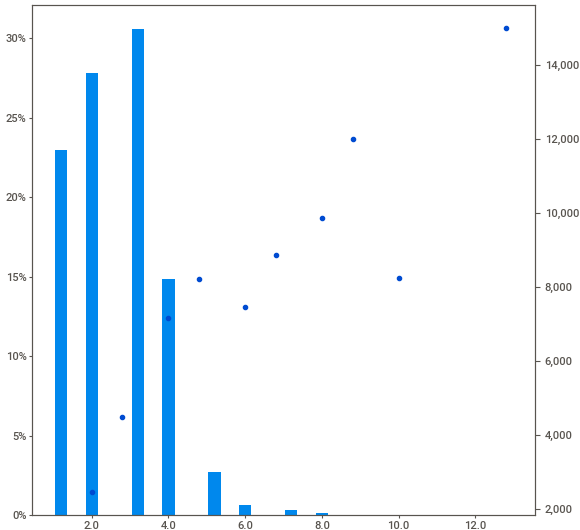
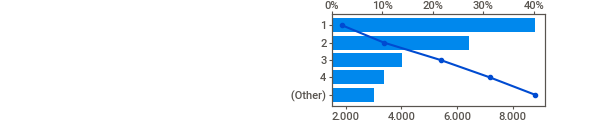
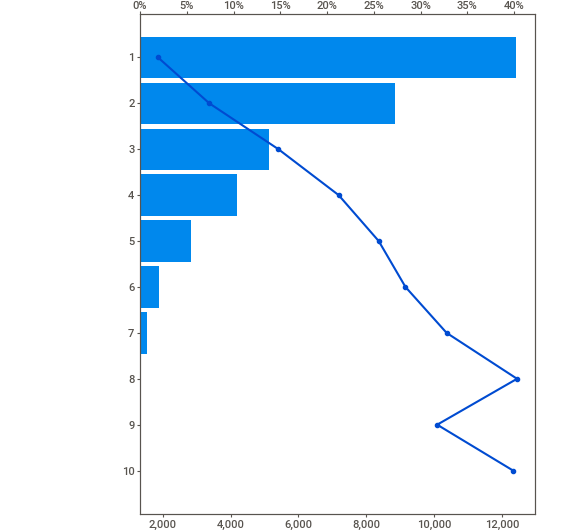
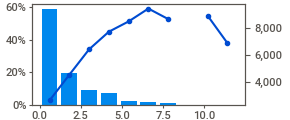
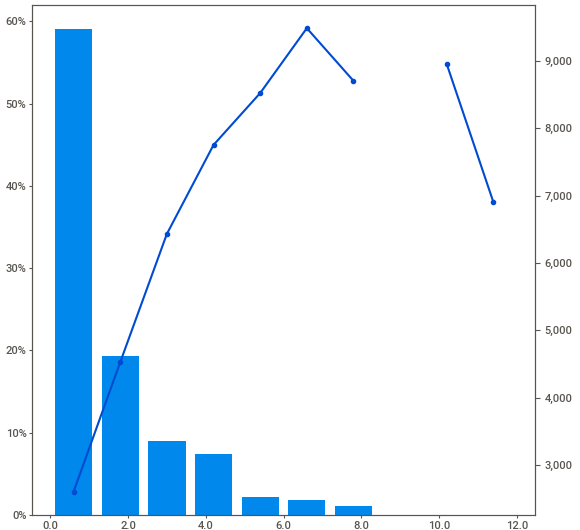
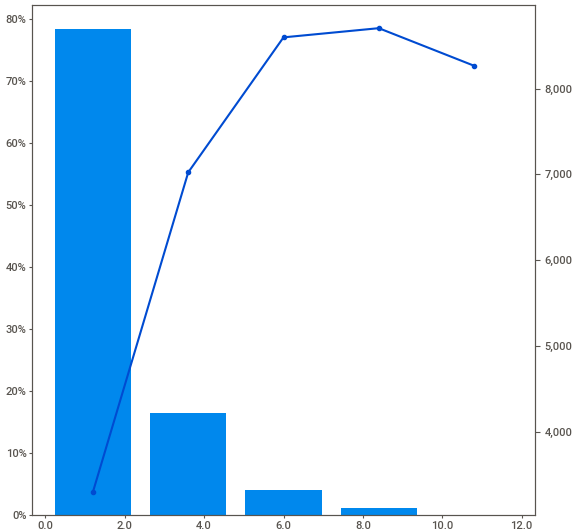
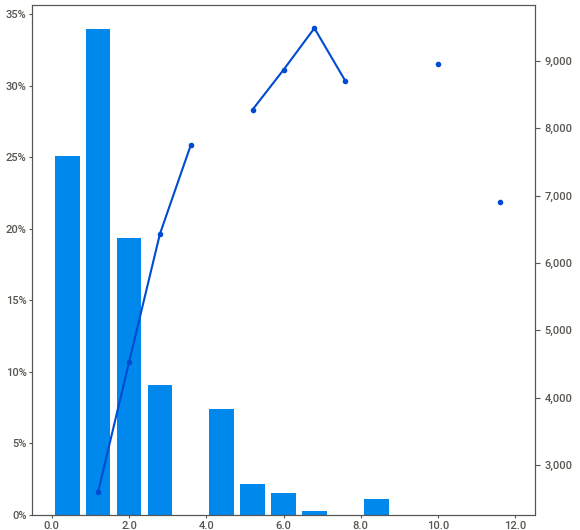
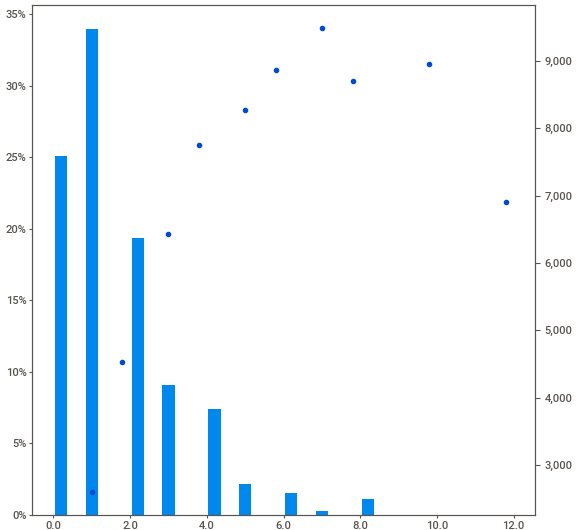
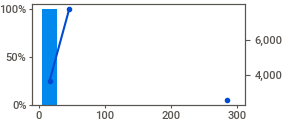
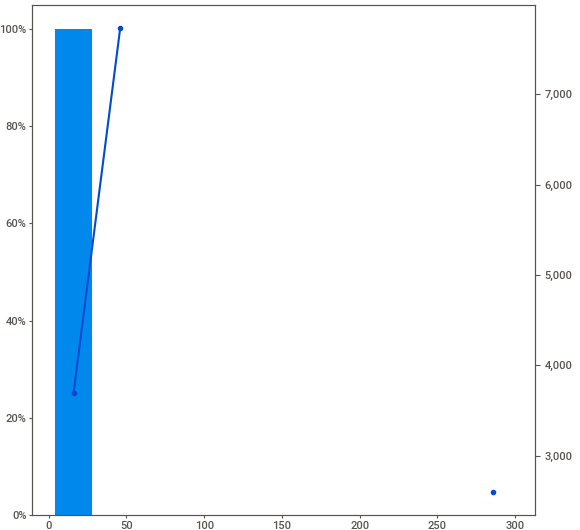
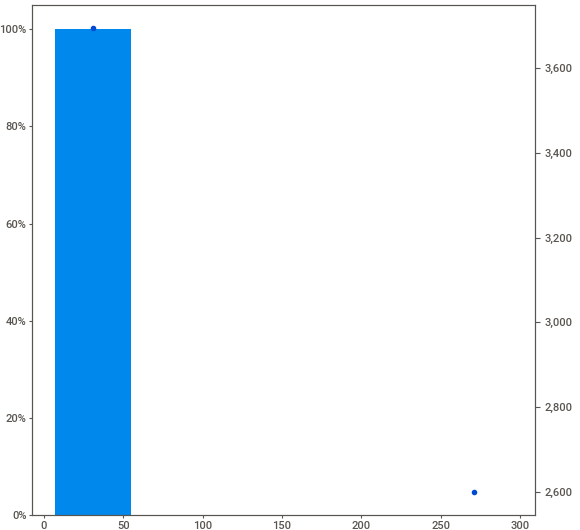
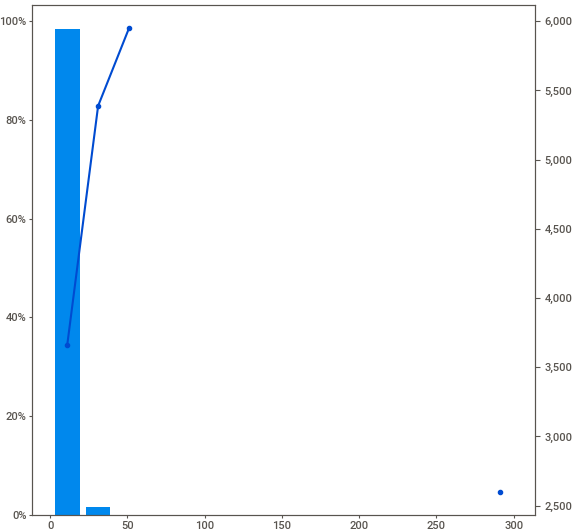
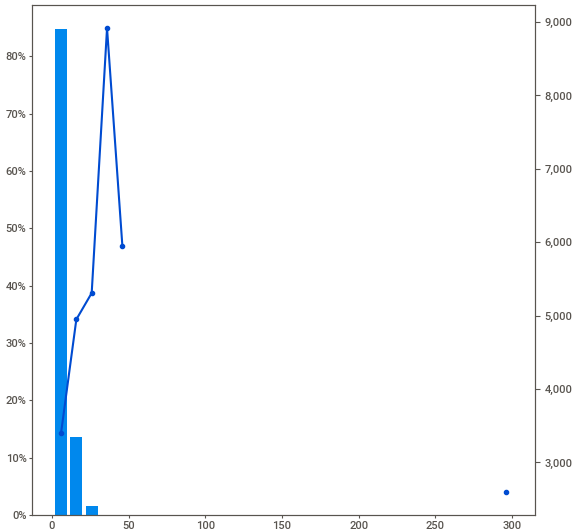
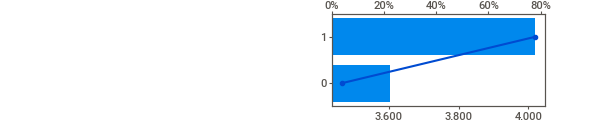
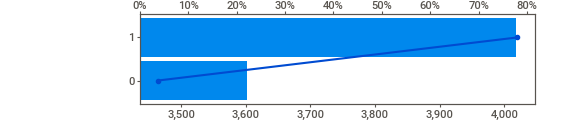
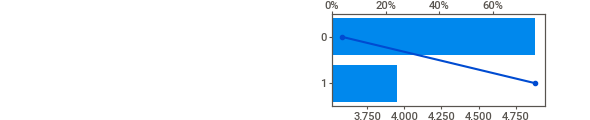
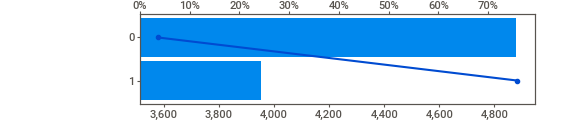
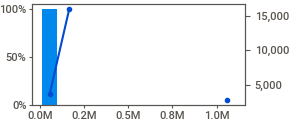
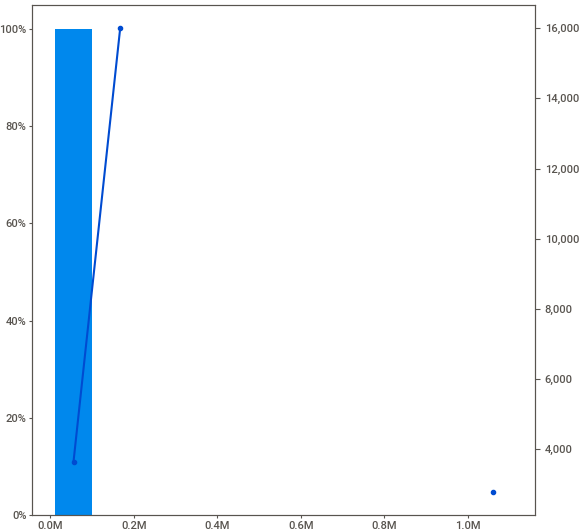
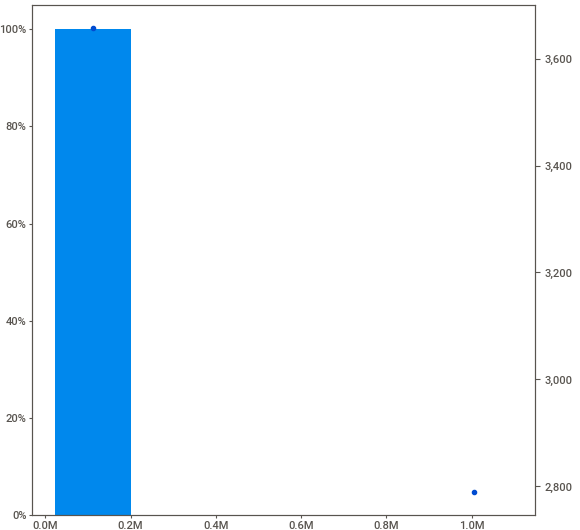
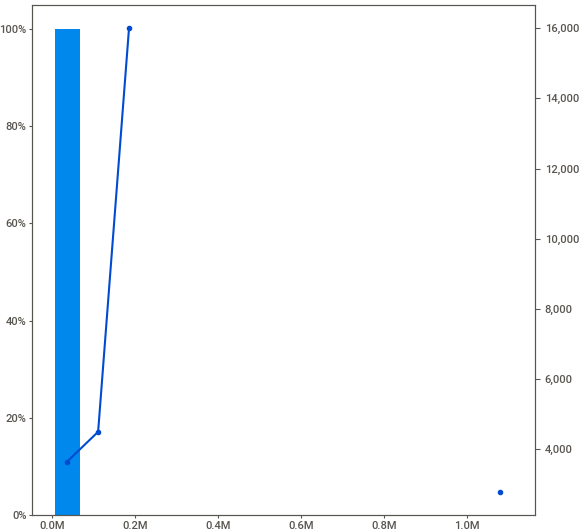
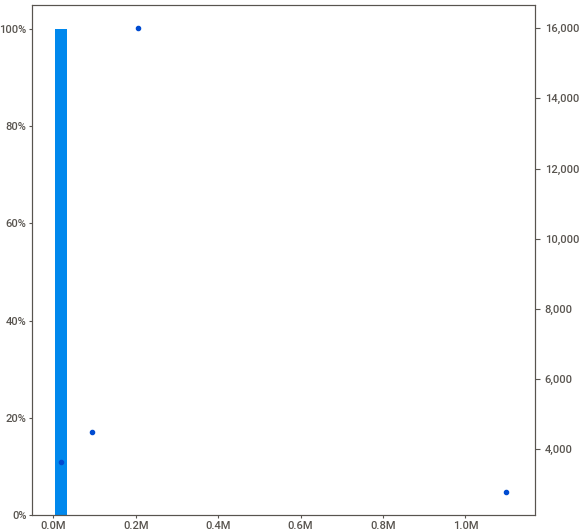
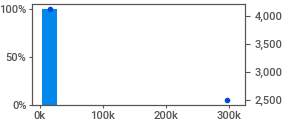
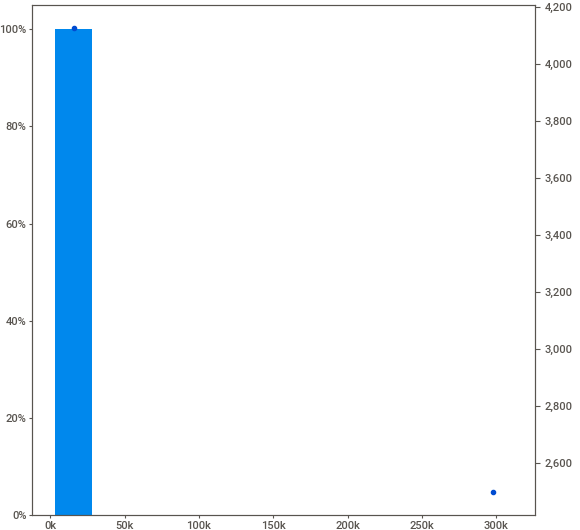
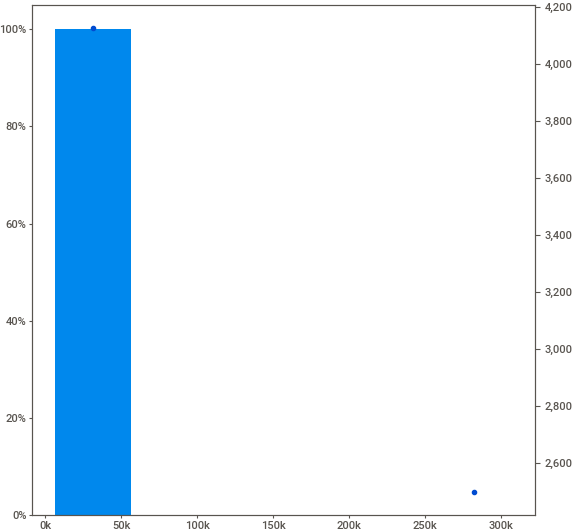
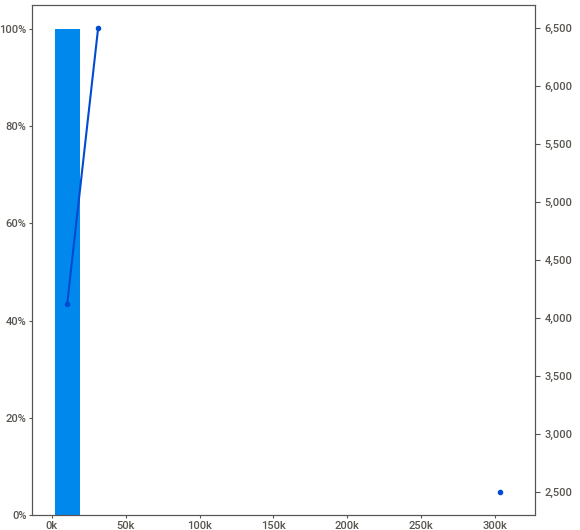
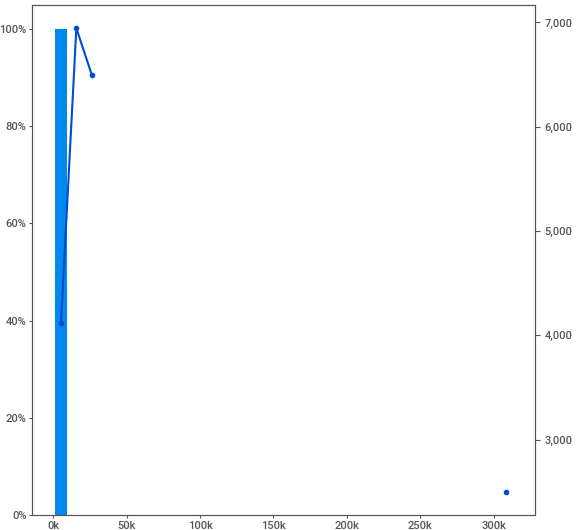
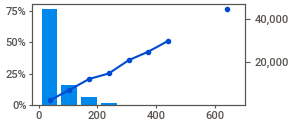
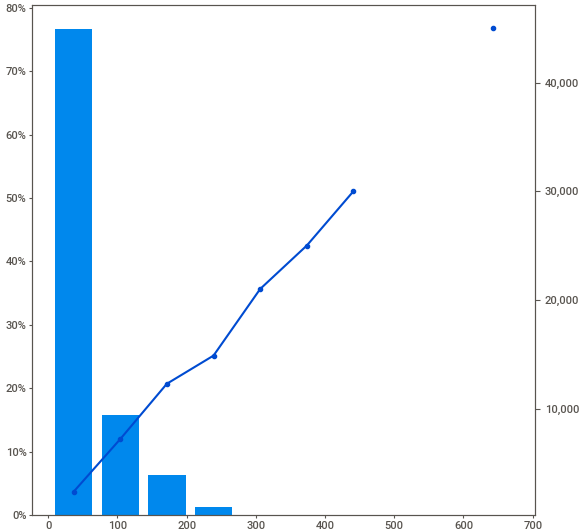
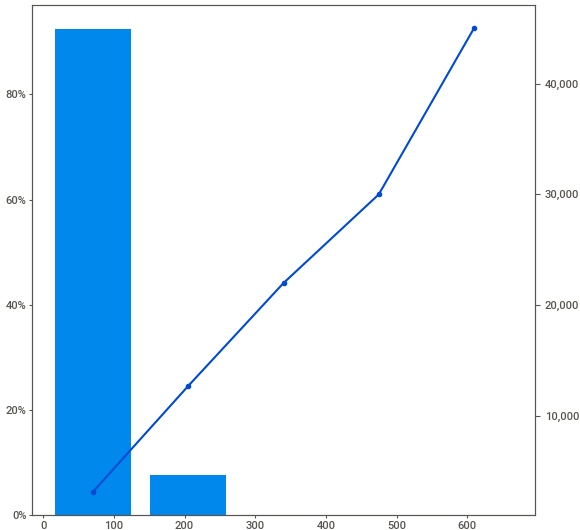
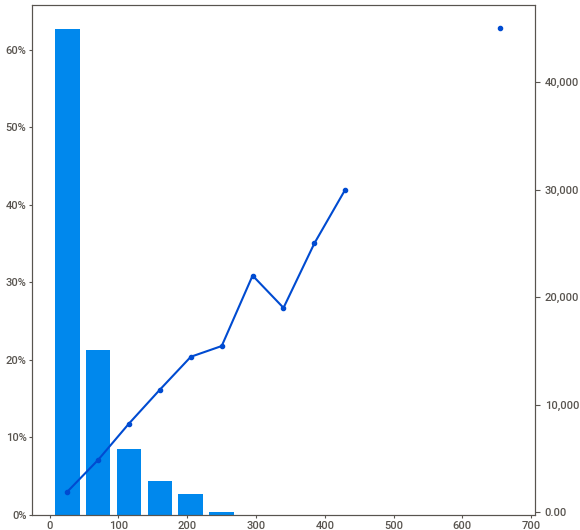
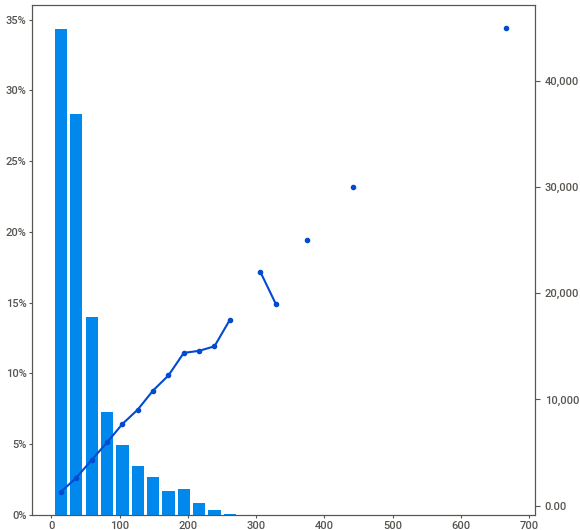
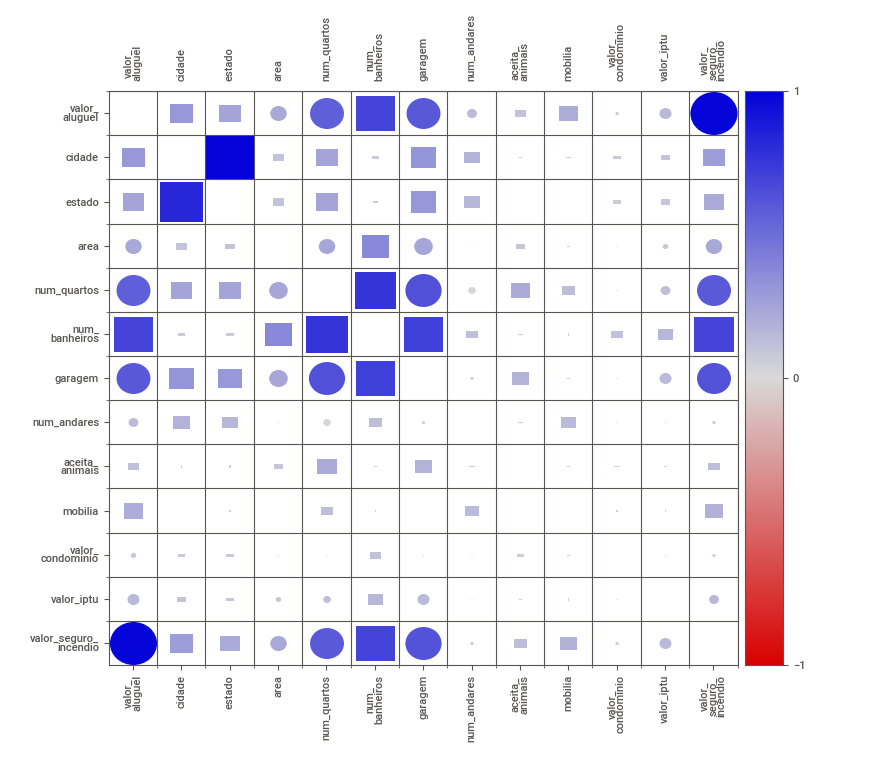
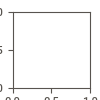

In [14]:
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

Intalando o plotly para visualizações dinamicas

In [15]:
!pip3 install plotly

In [16]:
import plotly.express as px
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()

In [17]:
import plotly.express as px
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

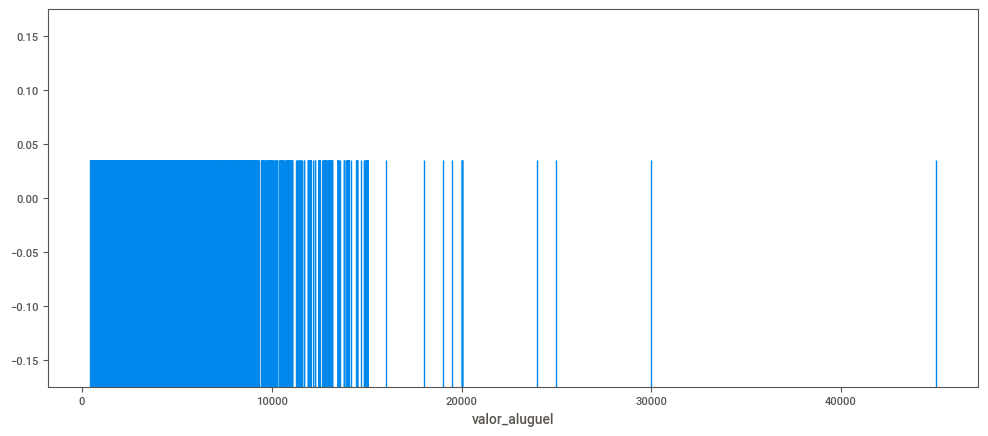

In [18]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

In [34]:
rel = data[['num_quartos', 'valor_aluguel']].corr()
rel

num_quartos  valor_aluguel
num_quartos       1.000000       0.541758
valor_aluguel     0.541758       1.000000

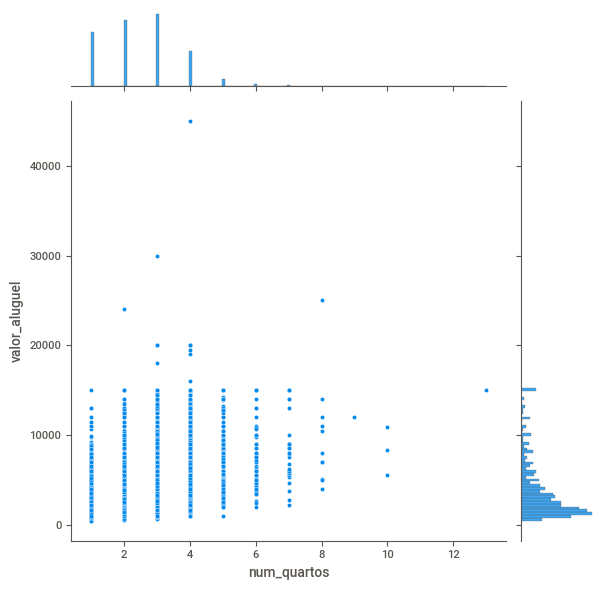

In [35]:
sns.jointplot(x=data['num_quartos'], y=data['valor_aluguel'])

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

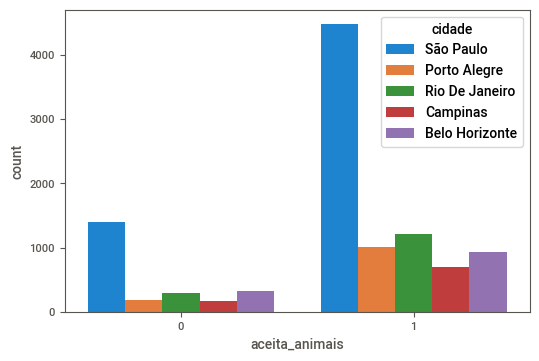

In [36]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [37]:
data.head()

cidade estado  ...  valor_iptu  valor_seguro_incendio
0     São Paulo     SP  ...         211                     42
1     São Paulo     SP  ...        1750                     63
2  Porto Alegre     RS  ...           0                     41
3  Porto Alegre     RS  ...          22                     17
4     São Paulo     SP  ...          25                     11

[5 rows x 13 columns]

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [38]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

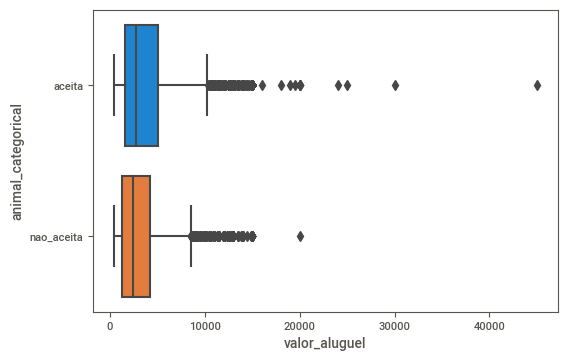

In [39]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [40]:
pd.DataFrame(data['cidade'].unique())

0
0       São Paulo
1    Porto Alegre
2  Rio De Janeiro
3        Campinas
4  Belo Horizonte

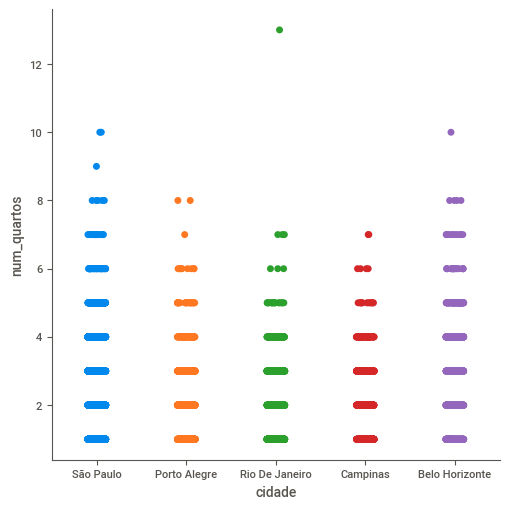

In [41]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

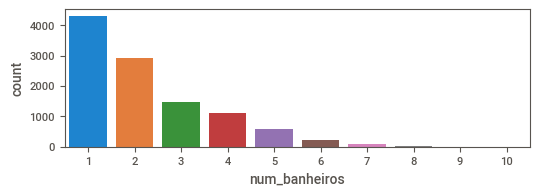

In [42]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

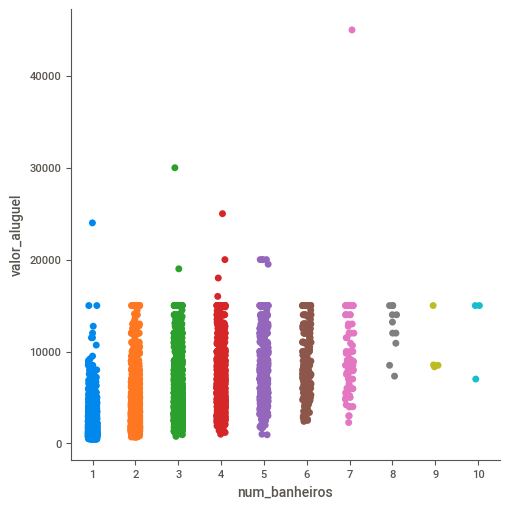

In [43]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [44]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

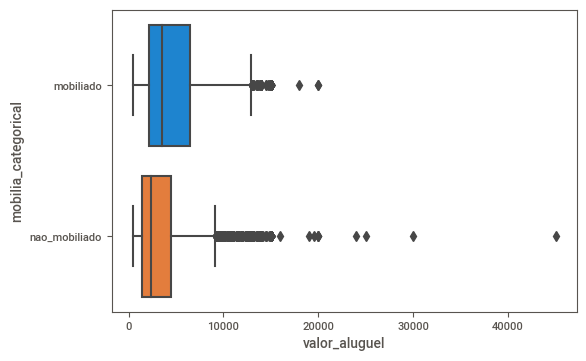

In [45]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

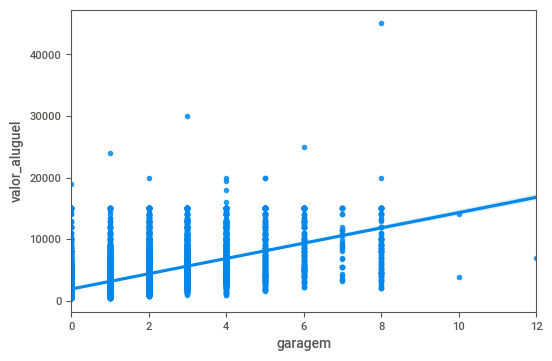

In [46]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

<Figure size 1000x600 with 0 Axes>

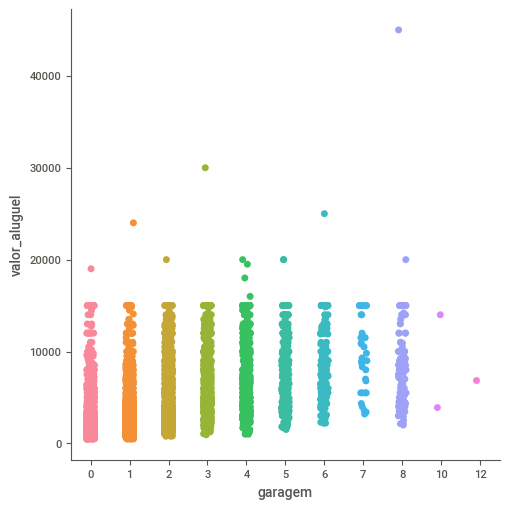

In [54]:
plt.figure(figsize =(10,6))
sns.catplot(x ='garagem', y ='valor_aluguel', data = data)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

In [ ]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data,hue ='cidade')

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

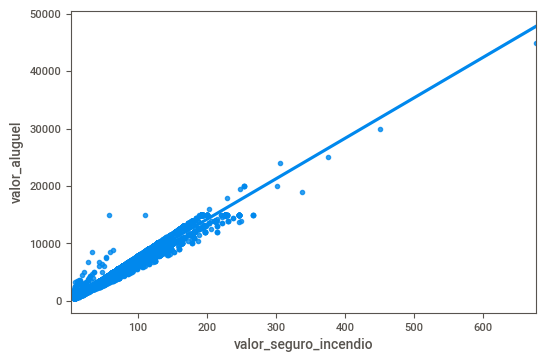

In [61]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

In [ ]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder**
- **One Hot Enconder**

Verificando a quantidade de valores únicos na coluna estado

In [63]:
data.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

Verificando a quantidade de valores únicos na coluna cidade

In [64]:
data.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio De Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [65]:
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [66]:
data.head()

area  num_quartos  ...  cidade__Rio De Janeiro  cidade__São Paulo
0    70            2  ...                       0                  1
1   320            4  ...                       0                  1
2    80            1  ...                       0                  0
3    51            2  ...                       0                  0
4    25            1  ...                       0                  1

[5 rows x 22 columns]

In [67]:
data.columns

Index(['area', 'num_quartos', 'num_banheiros', 'garagem', 'num_andares',
       'aceita_animais', 'mobilia', 'valor_aluguel', 'valor_condominio',
       'valor_iptu', 'valor_seguro_incendio', 'animal_categorical',
       'mobilia_categorical', 'estado__MG', 'estado__RJ', 'estado__RS',
       'estado__SP', 'cidade__Belo Horizonte', 'cidade__Campinas',
       'cidade__Porto Alegre', 'cidade__Rio De Janeiro', 'cidade__São Paulo'],
      dtype='object')

# Detecção de Outliers, Machine Learning

Excluindo os atributos categoricos

In [68]:
data.drop(["animal_categorical","mobilia_categorical"], axis=1, inplace=True)

Outlier Detection

Verificando os registros anomalos no atributo valor_aluguel

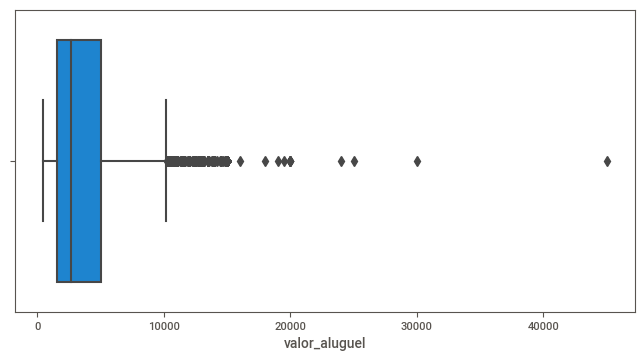

In [69]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['valor_aluguel'])
plt.show()

In [92]:
data.describe()

area  num_quartos  ...  cidade__Rio De Janeiro  cidade__São Paulo
count 10692.00     10692.00  ...                10692.00           10692.00
mean    149.22         2.51  ...                    0.14               0.55
std     537.02         1.17  ...                    0.35               0.50
min      11.00         1.00  ...                    0.00               0.00
25%      56.00         2.00  ...                    0.00               0.00
50%      90.00         2.00  ...                    0.00               1.00
75%     182.00         3.00  ...                    0.00               1.00
max   46335.00        13.00  ...                    1.00               1.00

[8 rows x 20 columns]

Quantil 1 = 25% dos dados.

In [71]:
Q1 = data["valor_aluguel"].quantile(.25)

Quantil 3 = 75% dos dados.

In [72]:
Q3 = data["valor_aluguel"].quantile(.75)

In [73]:
Q1,Q3

(1530.0, 5000.0)

Faixa de Intervalo Interqualítico

In [74]:
IQR = Q3 - Q1

In [75]:
IQR

3470.0

Calculando os limites

In [76]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [77]:
lower,upper

(-3675.0, 10205.0)

Definindo a seleção dos registros

In [78]:
data_clean = data[data['valor_aluguel'] >= lower] 

In [79]:
data_clean = data_clean[data_clean['valor_aluguel'] <= upper]

In [93]:
data_clean.describe()

area  num_quartos  ...  cidade__Rio De Janeiro  cidade__São Paulo
count  9977.00      9977.00  ...                 9977.00            9977.00
mean    134.48         2.42  ...                    0.14               0.54
std     550.67         1.12  ...                    0.35               0.50
min      11.00         1.00  ...                    0.00               0.00
25%      55.00         2.00  ...                    0.00               0.00
50%      85.00         2.00  ...                    0.00               1.00
75%     160.00         3.00  ...                    0.00               1.00
max   46335.00        10.00  ...                    1.00               1.00

[8 rows x 20 columns]

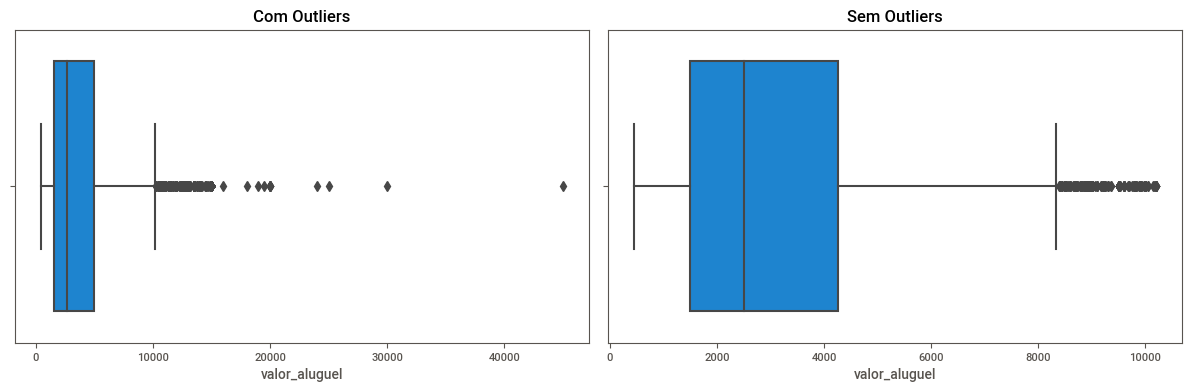

In [94]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Com Outliers')
sns.boxplot(x= data['valor_aluguel'])

plt.subplot(1, 2, 2)
plt.title('Sem Outliers')
sns.boxplot(x= data_clean['valor_aluguel'])

plt.tight_layout(pad=1.0)
plt.show()

In [95]:
data_clean.describe()

area  num_quartos  ...  cidade__Rio De Janeiro  cidade__São Paulo
count  9977.00      9977.00  ...                 9977.00            9977.00
mean    134.48         2.42  ...                    0.14               0.54
std     550.67         1.12  ...                    0.35               0.50
min      11.00         1.00  ...                    0.00               0.00
25%      55.00         2.00  ...                    0.00               0.00
50%      85.00         2.00  ...                    0.00               1.00
75%     160.00         3.00  ...                    0.00               1.00
max   46335.00        10.00  ...                    1.00               1.00

[8 rows x 20 columns]

Unificando os dataframes

In [96]:
data = data_clean

# Machine Learning

Separando os dados em features e classes.

In [97]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis =1)

Separando os conjuntos de treino e teste.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [101]:
acc=[]

**Calculando a nossa Baseline**

In [102]:
from sklearn.dummy import DummyRegressor

In [105]:
model = DummyRegressor(strategy="mean")

Iniciando o treinamento.

In [108]:
model.fit(X_train,y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

Fazendo as predições

In [109]:
preds = model.predict(X_test)

Calculando as métricas.

In [110]:
calcula_metricas(y_test,preds)

MAE: 1837.0877207658912
RMSE: 2349.122359407831
R2: -0.0002832613311634091


Armazendo o resultado.

In [111]:
acc.append(
            [
              'BAS', r2_score(y_test,preds)
            ]
          )

In [112]:
acc

[['BAS', -0.0002832613311634091]]

#### Treinando um modelo de Regressão Linear

Instanciando o estimator.

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

Iniciando o treinamento.

In [115]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fazendo as predições

In [116]:
preds = model.predict(X_test)

Calculando as métricas.

In [117]:
calcula_metricas(y_test,preds)

MAE: 238.46521314272968
RMSE: 617.6941189824743
R2: 0.9308394151504862


Armazendo o resultado.

In [118]:
acc.append(
            [
              'LIR', r2_score(y_test,preds)
            ]
          )

In [119]:
acc

[['BAS', -0.0002832613311634091], ['LIR', 0.9308394151504862]]

Decision Tree Regression

In [120]:
from sklearn.tree import DecisionTreeRegressor

Iniciando o treinamento.

In [121]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Fazendo as predições

In [122]:
preds = model.predict(X_test)

Calculando as métricas.

In [123]:
calcula_metricas(y_test,preds)

MAE: 68.23513694054776
RMSE: 275.0687349577116
R2: 0.9862850513943625


Armazendo o resultado.

In [124]:
acc.append(['DTR',r2_score(y_test,preds)])

In [125]:
acc

[['BAS', -0.0002832613311634091],
 ['LIR', 0.9308394151504862],
 ['DTR', 0.9862850513943625]]

Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor

Iniciando o treinamento.

In [127]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Fazendo as predições

In [128]:
preds = model.predict(X_test)

Calculando as métricas.

In [129]:
calcula_metricas(y_test,preds)

MAE: 65.11048727216338
RMSE: 205.65389583003204
R2: 0.9923337035991078


Armazendo o resultado.

In [130]:
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

In [131]:
acc

[['BAS', -0.0002832613311634091],
 ['LIR', 0.9308394151504862],
 ['DTR', 0.9862850513943625],
 ['RFN', 0.9923337035991078]]

KNN Regressor

In [132]:
from sklearn.neighbors import KNeighborsRegressor

Iniciando o treinamento.

In [133]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Fazendo as predições

In [134]:
preds = model.predict(X_test)

Calculando as métricas.

In [135]:
calcula_metricas(y_test,preds)

MAE: 708.478089512358
RMSE: 1125.7588151137345
R2: 0.7702780802728553


Armazendo o resultado.

In [136]:
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

In [137]:
acc

[['BAS', -0.0002832613311634091],
 ['LIR', 0.9308394151504862],
 ['DTR', 0.9862850513943625],
 ['RFN', 0.9923337035991078],
 ['KNNR', 0.7702780802728553]]

Ordenando os resultados.

In [138]:
acc.sort(key = lambda y:y[1],reverse =True)

In [139]:
acc

[['RFN', 0.9923337035991078],
 ['DTR', 0.9862850513943625],
 ['LIR', 0.9308394151504862],
 ['KNNR', 0.7702780802728553],
 ['BAS', -0.0002832613311634091]]

## Pycaret

In [ ]:
!pip install pycaret -U

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
connect_dw_imoveis = sqlite3.connect("/content/imoveis_dw.db")

In [4]:
data2 = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [5]:
data2.head()

cidade estado  ...  valor_iptu  valor_seguro_incendio
0     São Paulo     SP  ...         211                     42
1     São Paulo     SP  ...        1750                     63
2  Porto Alegre     RS  ...           0                     41
3  Porto Alegre     RS  ...          22                     17
4     São Paulo     SP  ...          25                     11

[5 rows x 13 columns]

In [6]:
from pycaret.regression import *

In [26]:
data_teste = data2.sample(frac=0.9, random_state=786)

In [27]:
data_teste.shape

(9623, 13)

In [32]:
data_teste.reset_index(drop=True, inplace=True)

In [33]:
data_teste.head()

cidade estado  ...  valor_iptu  valor_seguro_incendio
0  Belo Horizonte     MG  ...          77                     12
1  Belo Horizonte     MG  ...           0                     14
2       São Paulo     SP  ...        1201                    181
3  Rio De Janeiro     RJ  ...          25                     17
4    Porto Alegre     RS  ...          87                     29

[5 rows x 13 columns]

In [7]:
targets = setup( data2,  target='valor_aluguel',numeric_features = [ 'num_quartos','num_banheiros','garagem','num_andares','aceita_animais','mobilia'],log_experiment = True,experiment_name = 'exp-bootcamp')
#modelo = setup(data= data_teste, target='valor_aluguel', session_id=123)

Description           Value
0                               session_id            2197
1                                   Target   valor_aluguel
2                            Original Data     (10692, 13)
3                           Missing Values           False
4                         Numeric Features              10
5                     Categorical Features               2
6                         Ordinal Features           False
7                High Cardinality Features           False
8                  High Cardinality Method            None
9                    Transformed Train Set      (7484, 16)
10                    Transformed Test Set      (3208, 16)
11                      Shuffle Train-Test            True
12                     Stratify Train-Test           False
13                          Fold Generator           KFold
14                             Fold Number              10
15                                CPU Jobs              -1
16                                 Use GPU           False
17                          Log Experiment            True
18                         Experiment Name    exp-bootcamp
19                                     USI            6804
20                         Imputation Type          simple
21          Iterative Imputation Iteration            None
22                         Numeric Imputer            mean
23      Iterative Imputation Numeric Model            None
24                     Categorical Imputer        constant
25  Iterative Imputation Categorical Model            None
26           Unknown Categoricals Handling  least_frequent
27                               Normalize           False
28                        Normalize Method            None
29                          Transformation           False
30                   Transformation Method            None
31                                     PCA           False
32                              PCA Method            None
33                          PCA Components            None
34                     Ignore Low Variance           False
35                     Combine Rare Levels           False
36                    Rare Level Threshold            None
37                         Numeric Binning           False
38                         Remove Outliers           False
39                      Outliers Threshold            None
40                Remove Multicollinearity           False
41             Multicollinearity Threshold            None
42                              Clustering           False
43                    Clustering Iteration            None
44                     Polynomial Features           False
45                       Polynomial Degree            None
46                    Trignometry Features           False
47                    Polynomial Threshold            None
48                          Group Features           False
49                       Feature Selection           False
50                Feature Selection Method         classic
51            Features Selection Threshold            None
52                     Feature Interaction           False
53                           Feature Ratio           False
54                   Interaction Threshold            None
55                        Transform Target           False
56                 Transform Target Method         box-cox

Vamos comparar os modelos

In [8]:
best = compare_models(fold = 5)

Model    MAE         MSE    RMSE    R2  \
gbr           Gradient Boosting Regressor 122.50   165729.40  378.63  0.99   
et                  Extra Trees Regressor  86.66   168760.12  380.50  0.99   
catboost               CatBoost Regressor  98.72   168695.93  381.02  0.99   
xgboost         Extreme Gradient Boosting 102.91   173112.20  385.94  0.99   
lightgbm  Light Gradient Boosting Machine 110.06   187903.85  397.27  0.98   
rf                Random Forest Regressor  92.44   193223.55  407.76  0.98   
llar         Lasso Least Angle Regression 315.86   273645.08  522.70  0.98   
dt                Decision Tree Regressor  99.40   305166.71  526.10  0.97   
omp           Orthogonal Matching Pursuit 341.19   306879.79  553.67  0.97   
lar                Least Angle Regression 317.74   968652.68  782.29  0.92   
lasso                    Lasso Regression 316.23   969677.76  782.54  0.92   
ridge                    Ridge Regression 317.63   969646.03  782.54  0.92   
lr                      Linear Regression 317.66   969474.86  782.50  0.92   
br                         Bayesian Ridge 316.89   971204.64  782.90  0.92   
en                            Elastic Net 310.36  1024056.80  803.38  0.92   
ada                    AdaBoost Regressor 845.17  1077319.98 1029.97  0.91   
knn                 K Neighbors Regressor 951.51  2800000.60 1668.39  0.76   
huber                     Huber Regressor 319.32  5527744.01 1793.47  0.54   
par          Passive Aggressive Regressor 779.32 61158312.51 6305.84 -4.20   

          RMSLE  MAPE  TT (Sec)  
gbr        0.09  0.04      0.49  
et         0.08  0.03      1.29  
catboost   0.08  0.03      2.54  
xgboost    0.09  0.04      2.06  
lightgbm   0.09  0.04      0.18  
rf         0.09  0.03      1.77  
llar       0.13  0.09      0.02  
dt         0.11  0.03      0.04  
omp        0.14  0.09      0.01  
lar        0.15  0.10      0.02  
lasso      0.15  0.10      0.02  
ridge      0.15  0.10      0.01  
lr         0.15  0.10      0.44  
br         0.15  0.10      0.02  
en         0.13  0.08      0.02  
ada        0.41  0.42      0.29  
knn        0.32  0.27      0.08  
huber      0.15  0.08      0.13  
par        0.27  0.20      0.02

Listando os modelos

In [9]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
xgboost           Extreme Gradient Boosting  ...   True
lightgbm    Light Gradient Boosting Machine  ...   True
catboost                 CatBoost Regressor  ...   True

[25 rows x 3 columns]

Selecionando o melhor algoritmo

In [10]:
gbr = create_model('gbr', fold = 5)

MAE       MSE   RMSE   R2  RMSLE  MAPE
0    114.76  82469.66 287.18 0.99   0.08  0.04
1    118.34 128166.95 358.00 0.99   0.10  0.04
2    120.47  78292.41 279.81 0.99   0.08  0.04
3    133.48 452323.42 672.55 0.96   0.09  0.04
4    125.46  87394.56 295.63 0.99   0.11  0.05
Mean 122.50 165729.40 378.63 0.99   0.09  0.04
SD     6.49 144402.79 149.56 0.01   0.01  0.00

Otimizando o modelo

In [11]:
tuned_et = tune_model(gbr,fold=5)

MAE       MSE   RMSE   R2  RMSLE  MAPE
0    125.37  87476.64 295.76 0.99   0.09  0.05
1    133.17 137619.80 370.97 0.99   0.11  0.05
2    132.62  85665.69 292.69 0.99   0.09  0.05
3    137.99 449804.59 670.67 0.96   0.09  0.05
4    138.66  89656.48 299.43 0.99   0.11  0.05
Mean 133.56 170044.64 385.90 0.99   0.10  0.05
SD     4.77 141220.78 145.33 0.01   0.01  0.00

Visualizando os residuais

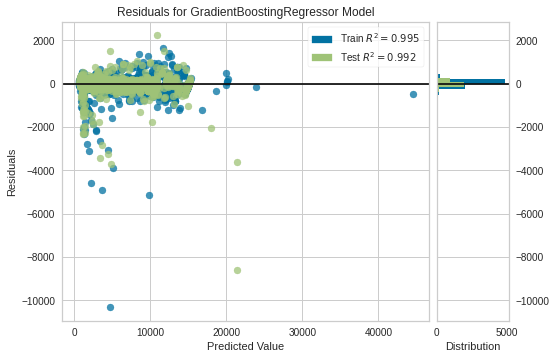

In [12]:
plot_model(gbr)

Visualizando o erro do modelo

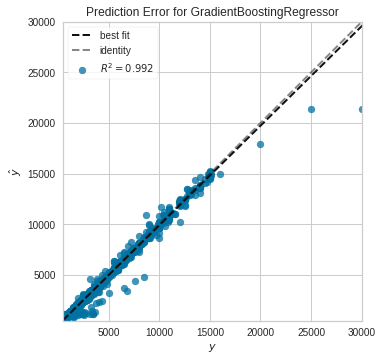

In [13]:
plot_model(gbr, plot = 'error')

Visualizando as features importantes

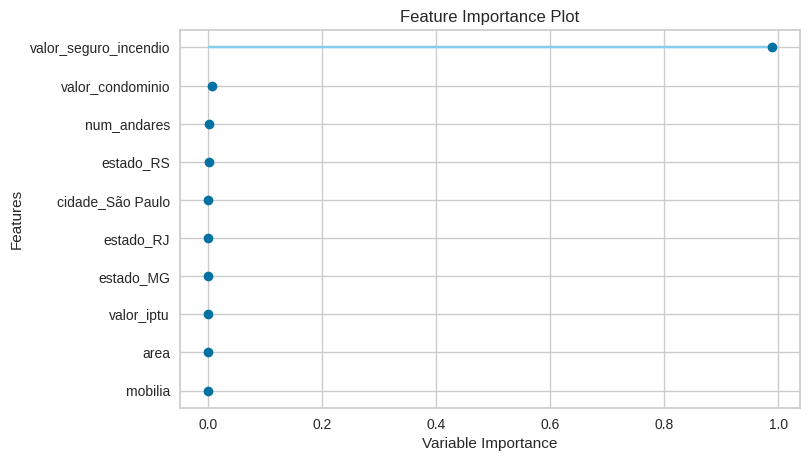

In [14]:
plot_model(gbr, plot='feature')

Finaliza o modelo

In [15]:
final_gbr = finalize_model(gbr)

Salva o modelo

In [16]:
save_model(final_gbr,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['num_quartos',
                                                           'num_banheiros',
                                                           'garagem',
                                                           'num_andares',
                                                           'aceita_animais',
                                                           'mobilia'],
                                       target='valor_aluguel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy=...
                                            learning_rate=0.1, loss='ls',
  

In [17]:
!ls

catboost_info  logs.log  modelo-final.pkl  SWEETVIZ_REPORT.html
imoveis_dw.db  mlruns	 sample_data


### Test Time

In [18]:
model_test = load_model('modelo-final')

Transformation Pipeline and Model Successfully Loaded


In [19]:
data_teste = data2.drop(["valor_aluguel"],axis=1)

In [20]:
predict_model(model_test, data=data_teste)

cidade estado  area  ...  valor_iptu  valor_seguro_incendio    Label
0           São Paulo     SP    70  ...         211                     42  3383.46
1           São Paulo     SP   320  ...        1750                     63  5255.28
2        Porto Alegre     RS    80  ...           0                     41  2866.26
3        Porto Alegre     RS    51  ...          22                     17  1099.08
4           São Paulo     SP    25  ...          25                     11   858.62
...               ...    ...   ...  ...         ...                    ...      ...
10687    Porto Alegre     RS    63  ...          24                     22  1510.55
10688       São Paulo     SP   285  ...         973                    191 15024.55
10689  Rio De Janeiro     RJ    70  ...         332                     78  6118.55
10690  Rio De Janeiro     RJ   120  ...         279                    155 12180.25
10691       São Paulo     SP    80  ...         165                     22  1509.61

[10692 rows x 13 columns]

In [22]:
!pip freeze > requirements.txt